## Mutable Data


In [1]:
(import "builtins")
(define python builtins)

(import "requests")
(import "IPython.display")


(define url "http://192.168.225.37:8000/box")

(define (box code)
  (define r (requests.post url (python.str code)))
  (IPython.display.Image r.content None None "png"))



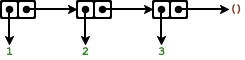

In [10]:
(box '(list 1 2 3))

In [15]:


(define x '((a b) c d))
(define y '(e f))
(define z (cons y (cdr x)))



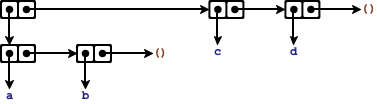

In [16]:
(box '(list (list 'a 'b) 'c 'd))



Problem: We have implemented a utility called append to append two lists together. Implement a mutable version of it, append! that modfies the first list. It is an error to call append! with empty list as first argument.
```
> (define x (list 1 2 3))
> (define y (list 4 5))
> (append! x y)
done
> x
(1 2 3 4 5)
```


In [38]:
(define (append! l1 l2) 
      (cond ((eq? (cdr l1) ()) (set-cdr! l1 l2))
            (else (append! (cdr l1) l2))))

In [44]:
(define x '(1))
(define y '(5 6 7 8 ))

In [45]:
(append! x y)

In [47]:
x

(1 5 6 7 8)



Problem: Consider the following snippets of code.
```
(define x (list 'a 'b))
(define z1 (cons x x))
(define z2 (cons (list 'a 'b) (list 'a 'b)))
```
Are z1 and z2 the same? Explain it using box-and-pointer diagram.

If you think they are not the same, can you suggest an operation that will produce different result on z1 and z2.


In [76]:
(define x (list 'a 'b))
(define z1 (cons x x))
(define z2 (cons (list 'a 'b) (list 'a 'b)))

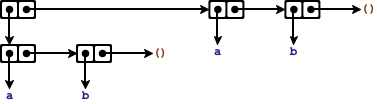

In [77]:
(box '(cons (list 'a 'b) (list 'a 'b)))

In [78]:
z1


((a b) a b)

In [79]:
z2

((a b) a b)

In [80]:
(define (f z) 
  (define x '(1))
  (append! z x)
  (cddar z))

In [81]:
(f z1)

(1)

In [82]:
(f z2)

()

## Queues

```
(define q (make-queue))
(insert-queue! q 'a)  ; a
(insert-queue! q 'b)  ; a b
(delete-queue! q)     ; a -- b
(insert-queue! q 'c)  ; b c
(insert-queue! q 'd)  ; b c d
(delete-queue! q)     ; b -- c d

(empty-queue? q) ; tests if q is empty
```

In [84]:
(define (make-queue) 
  (cons '() '()))

In [274]:
(define (set-front-ptr! q inx) 
      (set-car! q inx))

(define (set-rear-ptr! q inx) 
      (set-cdr! q inx))

(define (set-rear-elem! q inx) 
      (set-cdr! (cdr q) inx))

(define (set-front-elem! q inx) 
      (set-car! q (cdar q)))

(define (front-elem q) 
      (caar q))

(define (second-elem q) 
      (cdar q))

(define (show q) (car q))

In [248]:
(define (insert-queue! q x) 
  (let ((inx (list x)))
       (cond
            ((empty-queue? q) 
                 (set-front-ptr! q inx)
                 (set-rear-ptr! q inx))
            (else 
                 (set-rear-elem! q inx)
                 (set-rear-ptr! q inx)))))

In [249]:
(define (delete-queue! q) 
  (cond
       ((empty-queue? q) None)
       ((eq? (second-elem q) '()) 
            (set! x (front-elem q))
            (set-front-ptr! q '())
            (set-rear-ptr! q '())
            x)
       (else
            (set! x (front-elem q))
            (set-front-elem! q (cdar q))
            x)))

In [262]:
(define (empty-queue? q)
      (eq? (car q) '()))

In [263]:
(define q1 (make-queue))
q1

(())

In [264]:
(empty-queue? q1)

#t

In [265]:
(insert-queue! q1 1)

In [266]:
(show! q1)

(1)

In [267]:
(insert-queue! q1 2)
(show! q1)

(1 2)

In [268]:
(delete-queue! q1)

1

In [269]:
(show! q1)

(2)

In [270]:
(delete-queue! q1)

2

In [271]:
(show! q1)

()

In [272]:
(delete-queue! q1)

In [273]:
(show! q1)

()


### Table
```
(make-table)
(lookup key table)
(insert! key value table)
```


In [300]:
(define (make-table)
      (cons 'TABLE '()))

In [301]:
(define T (make-table))

In [302]:
T

(TABLE)

In [304]:
(define (empty-table? table)
      (eq? (cdr table) '()))

In [305]:
(empty-table? T)

#t

In [299]:
(define (make-key-value key value)
      (cons key value))

(define (make-table-elem key value)
      (cons (make-key-value key value) '()))

In [ ]:
(define (insert! key value table) 
      (let ((elem (make-table-elem key value)))
      (cond ((empty-table? table) 
                 (set! ))
            ())))

In [285]:
(insert! 'a 1 T)

In [287]:
(show T)

((a . 1))

In [288]:
(insert! 'b 2 T)
(show T)

((a . 1) (b . 2))

In [419]:
;; the table implementation
(define (make-table)
  (cons '*table* '()))

(define (table-records table) 
  (cdr table))

(define set-table-records! set-cdr!)

(define (assoc key records)
  (cond ((null? records) #f)
        ((eq? key (caar records))
         (car records))
        (else (assoc key (cdr records)))))

(define (insert! key value table)
  (let ((record (assoc key (table-records table))))
    (if record
        (set-cdr! record value)
        (set-table-records! 
         table
         (cons (cons key value)
           (table-records table))))
    'done))

(define (lookup key table)
  (let ((record (assoc key (table-records table))))
    (if record
        (cdr record)
        #f)))

## Metacircular interpreter v1

In [420]:

;; def add(exp):
;;     return sum(exp)

;; def sub(exp):
;;     return exp[0] - exp[1]

;; def multiply(exp):
;;     return exp[0] * exp[1]

;; def divide(exp):
;;     return exp[0] / exp[1]

;; def mod(exp):
;;     return exp[0] % exp[1]

;; def gt(exp):
;;     return exp[0] > exp[1]

;; def lt(exp):
;;     return exp[0] < exp[1]

;; def eq(exp):
;;     return exp[0] == exp[1]

In [421]:
(define (reset-env env) 
      (define (add exp) 
            (apply + exp))
      (define (sub exp) 
            (apply - exp))
      (define (mul exp) 
            (apply * exp))
      (define (div exp) 
            (apply / exp))
      (define (mod exp) 
            (apply % exp))
      (define (gt exp) 
            (apply > exp))
      (define (lt exp) 
            (apply < exp))
      (define (eq exp) 
            (apply eq? exp))
  
      (insert! '+ add env)
      (insert! '- sub env)
      (insert! '* mul env)
      (insert! '/ div env)
      (insert! '% mod env)
      (insert! '> gt env)
      (insert! '< lt env)
      (insert! '= eq env)
      )

In [422]:
(define (getcondif exp) 
    (cadr exp))
(define (getxif exp) 
    (caddr exp))
(define (getyif exp) 
    (cadddr exp))


(define (getvardef exp) 
    (cadr exp))
(define (getvaldef exp) 
    (caddr exp))

In [437]:
(define (x a b) (+ a b))

In [441]:
(define (map-eval l env)
      (cond ((null? l) '())
            (else (cons (eval (car l) env) (map-eval (cdr l) env)))))

### Checks

In [699]:

(define (literal? exp) 
    (number? exp))
(define (variable? exp) 
    (symbol? exp))
(define (conditional? exp) 
    (and (> (length exp) 1) (eq? (car exp) 'if)))
(define (define? exp) 
    (and (> (length exp) 1) (eq? (car exp) 'define)))
(define (mprocedure? exp env) 
    (list? exp))


### Functions

In [753]:

(define (eval_literal exp) 
    exp)

(define (lookupenv exp env) 
    (let ((lookupval (lookup exp env)))
      ;; (display lookupval)
      (if lookupval
          (lookupenv lookupval env)
          exp)))

(define (eval_cond exp env) 
    (let ((condition (eval (getcondif exp) env))
          (x (eval (getxif exp) env))
          (y (eval (getyif exp) env))) 

          (if condition
              x
              y)))

(define (definefunc exp env) 
    (let ((var (getvardef exp))
          (value (eval (getvaldef exp) env)))

          (insert! var value env)))

(define (call_procedure exp env) 
   (if (> (length exp) 0)
    (let ((proc (eval (car exp) env)))

          (cond ((procedure? proc) 
                     ;; (display (cdr exp))
                     (proc (map-eval (cdr exp) env)))
                ((eq? (length exp) 1) (car exp))
                (else 
                     (display "Illegal function")
                     None)))
      None
          ))

### Markdown

In [754]:
(define (eval exp env) 
  
  (cond ((literal? exp) 
             (eval_literal exp))
        ((variable? exp) 
             (lookupenv exp env))
        ((conditional? exp) 
             (eval_cond exp env))
        ((define? exp) 
             (definefunc exp env))
        ((mprocedure? exp env)
             (call_procedure exp env))
        (else 
             (error "Looks like a syntax issue") 
             None)))

In [755]:
(define env (make-table))
(reset-env env)

done

In [756]:
(define exp '(* 1 2 3))

In [757]:
(eval exp env)

6

self evaluating

In [758]:
(eval '1 env)

1

define

In [759]:
(eval '(define x 10) env)

done

In [760]:
(eval 'x env)

10

null func

In [761]:
(eval '() env)

arithmetic

In [762]:
(eval '(+ 1 2) env)

3

In [763]:
(eval '(+ (* 2 3) (* 4 5)) env)

26

In [764]:
(eval '(* (+ 2 3) (+ 4 5)) env)

45

In [765]:
(eval '(define x 10) env)

done

In [766]:
(eval '(+ x 1) env)

11

In [767]:
(eval '(* x (+ x 1)) env)

110

Conditional

In [768]:
(eval '(if (> 2 1) 20 10) env)

20

In [769]:
(eval '(if (< 2 1) 20 10) env)

10

In [770]:
(eval '(define x 10) env)

done

In [771]:
(eval '(if (> x 1) (+ x 1) oops!) env)

11

MISC

In [772]:
(eval '(define plus +) env)

done

In [773]:
(eval '(plus 2 3) env)

5

In [774]:
(eval '(define + 3) env)

done

In [775]:
(eval '(* + +) env)

9

In [776]:
(eval '(+ 1 2) env)

Illegal function